In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.linear_model import LinearRegression
from sklearn import datasets
from sklearn.metrics import accuracy_score
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
Data = datasets.load_boston()

In [4]:
x = Data.data[:,5]
y = Data.target

In [5]:
a = np.random.rand()
b = np.random.rand()

In [6]:
lr = 0.01
n_epochs = 100000

In [7]:
for epoch in range(n_epochs):
    yhat = a + b*x
    error = (y - yhat)
    a_grad = -2 * error.mean()
    b_grad = -2 * (x * error).mean()
    a -= lr * a_grad
    b -= lr * b_grad

In [8]:
print("a: ", a, "\nb: ", b)

a:  -34.670620775166995 
b:  9.102108980980413


In [9]:
y1 = a + b*x

In [10]:
model = LinearRegression()

In [11]:
model.fit(x.reshape((-1, 1)), y);

In [12]:
a = model.intercept_
b = model.coef_

In [13]:
print("a: ", a, "\nb: ", b)

a:  -34.67062077643851 
b:  [9.10210898]


In [14]:
y2 = a + b*x

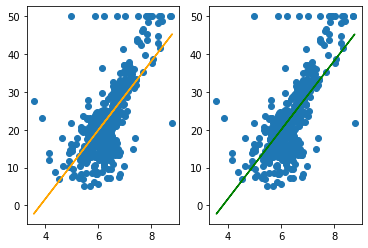

In [15]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.scatter(x,y)
ax1.plot(x,y1, color="orange")

ax2.scatter(x,y)
ax2.plot(x,y2,color="green")

plt.show()

## Нормальное уравнение 
$\Large w = {(X^TX)}^{-1}X^Ty$

In [ ]:
def normal_equation(X, y):
    return ((np.linalg.inv(X.T.dot(X))).dot(X.T)).dot(y)

In [25]:
# Сохранение модели в файл
pickle.dump(model, open('model.pickle', 'wb'))

In [26]:
# Загрузка модели из файла
loaded_model = pickle.load(open('model.pickle', 'rb'))

In [27]:
predicted = loaded_model.predict(x.reshape((-1, 1)))